\nSolution
14 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    x10 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   1.0 :     1 : False : False : Binary
    x4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    x5 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :     1 : False : False : Binary
    x6 : Size=1, Index=None
        Key  : Lower : Value

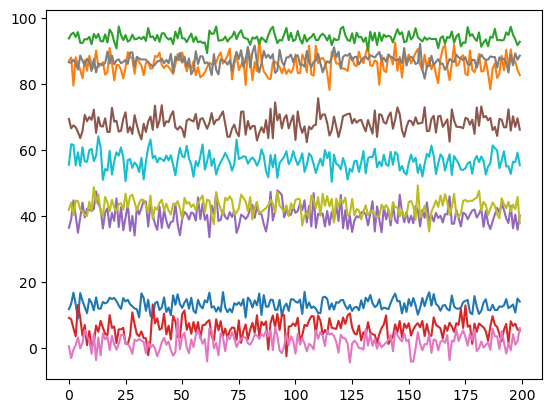

In [1]:
#!pip3 install pyomo
#!apt install glpk-utils
#!pip install glpk
from pyomo.environ import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Generate Data for Mean-Variance Model
df = pd.read_csv("investments_data.csv",sep=";", header=None)
headers = []
for i in range(len(df.columns)):
    headers.append("Investment"+str((i+1)))
df.columns = headers

plt.plot(df["Investment1"])
plt.plot(df["Investment2"])
plt.plot(df["Investment3"])
plt.plot(df["Investment4"])
plt.plot(df["Investment5"])
plt.plot(df["Investment6"])
plt.plot(df["Investment7"])
plt.plot(df["Investment8"])
plt.plot(df["Investment9"])
plt.plot(df["Investment10"])

means = df.mean(0)
variances = df.var(0)

investment_costs = {
    1: 80,
    2: 340,
    3: 410,
    4: 50,
    5: 180,
    6: 221,
    7: 15,
    8: 348,
    9: 191,
    10: 225
}
#THESE ARE ALREADY IN THE CODE AS VALUES, BUT MAY BE USEFUL

# create a model

model = ConcreteModel()

# flow variables
model.x1 = Var(domain=Binary)
model.x2 = Var(domain=Binary)
model.x3 = Var(domain=Binary)
model.x4 = Var(domain=Binary)
model.x5 = Var(domain=Binary)
model.x6 = Var(domain=Binary)
model.x7 = Var(domain=Binary)
model.x8 = Var(domain=Binary)
model.x9 = Var(domain=Binary)
model.x10 = Var(domain=Binary)

model.z1 = Var(domain=Binary)
model.z2 = Var(domain=Binary)
model.z3 = Var(domain=Binary)
model.z4 = Var(domain=Binary)

r=2
eps = 0.4

# declare objective
model.profit = Objective(expr = (means[0]-r*variances[0])*model.x1 + (means[1]-r*variances[1])*model.x2 + (means[2]-r*variances[2])*model.x3 \
                         + (means[3]-r*variances[3])*model.x4 + (means[4]-r*variances[4])*model.x5 + (means[5]-r*variances[5])*model.x6 \
                             + (means[6]-r*variances[6])*model.x7 + (means[7]-r*variances[7])*model.x8 + (means[8]-r*variances[8])*model.x9 \
                                 + (means[9]-r*variances[9])*model.x10 , sense=maximize)


# declare constraints
model.constrA = Constraint(expr = 80*model.x1 + 340*model.x2 + 410*model.x3 + 50*model.x4 + 180*model.x5 + 221*model.x6 + \
                           15*model.x7 + 348*model.x8 + 191*model.x9 + 225*model.x10 + 2100*model.z1<= 1000+2100)
    
model.constrB = Constraint(expr = 80*model.x1 + 340*model.x2 + 410*model.x3 + 50*model.x4 + 180*model.x5 + 221*model.x6 + \
                               15*model.x7 + 348*model.x8 + 191*model.x9 + 225*model.x10 + 2100*model.z2<= 1100+2100)
    
model.constrC = Constraint(expr = 80*model.x1 + 340*model.x2 + 410*model.x3 + 50*model.x4 + 180*model.x5 + 221*model.x6 + \
                           15*model.x7 + 348*model.x8 + 191*model.x9 + 225*model.x10 + 2100*model.z3<= 900+2100)
    
model.constrD = Constraint(expr = 80*model.x1 + 340*model.x2 + 410*model.x3 + 50*model.x4 + 180*model.x5 + 221*model.x6 + \
                               15*model.x7 + 348*model.x8 + 191*model.x9 + 225*model.x10 + 2100*model.z4<= 1200+2100)
    
model.constrE = Constraint(expr = 0.55*model.z1 + 0.4*model.z2 + 0.04*model.z3 + 0.01*model.z4 >=1-eps)

# solve
print("\\nSolution")
results = SolverFactory('glpk').solve(model)
#results.write()
if results.solver.status== 'ok':
    model.pprint()

# # display solution
print('\nProfit = ', model.profit())